In [8]:
setwd("~/Desktop/Vizathon")
library(tm)
library(wordcloud)
library(dplyr)
library(ggplot2)
library(forcats)
library(readxl)
library(stringr)

In [6]:
policy <- read.csv('CDC_Nutrition__Physical_Activity__and_Obesity_-_Legislation.csv')

## Obesity goes up with food insecurity

Questions answered:

1/ Is there a correration between obesity and food insecurity? In adult and in children

2/ Obesity rate difference by food insecurity level of different demographic groups

In [9]:
insecurity <- read_excel('DataDownload.xls', sheet='INSECURITY')
colnames(insecurity) <- str_to_lower(colnames(insecurity))

In [10]:
head(insecurity)

fips,state,county,foodinsec_00_02,foodinsec_07_09,foodinsec_10_12,ch_foodinsec_02_12,ch_foodinsec_09_12,vlfoodsec_00_02,vlfoodsec_07_09,vlfoodsec_10_12,ch_vlfoodsec_02_12,ch_vlfoodsec_09_12,foodinsec_child_01_07,foodinsec_child_03_11
01001,AL,Autauga,12.5,15,17.9,5.4,2.9,3.7,6.8,6.8,3.1,0,8.5,9.3
01003,AL,Baldwin,12.5,15,17.9,5.4,2.9,3.7,6.8,6.8,3.1,0,8.5,9.3
01005,AL,Barbour,12.5,15,17.9,5.4,2.9,3.7,6.8,6.8,3.1,0,8.5,9.3
01007,AL,Bibb,12.5,15,17.9,5.4,2.9,3.7,6.8,6.8,3.1,0,8.5,9.3
01009,AL,Blount,12.5,15,17.9,5.4,2.9,3.7,6.8,6.8,3.1,0,8.5,9.3
01011,AL,Bullock,12.5,15,17.9,5.4,2.9,3.7,6.8,6.8,3.1,0,8.5,9.3


In [13]:
insecurity_cleaned <- insecurity %>% select(fips, state, county, 
                                            food_insecurity10_12 = foodinsec_10_12, 
                                            very_low_food_security10_12 = vlfoodsec_10_12,
                                            child_food_insecurity03_11 = foodinsec_child_03_11 )

In [14]:
health <- read_excel('DataDownload.xls', sheet='HEALTH')
colnames(health) <- str_to_lower(colnames(health))
obesity <- health %>% select(fips, pct_obese_adults13,
                             pct_obese_child08, pct_obese_child11)
insecurity_cleaned <- insecurity_cleaned %>% left_join(obesity, by="fips")

In [15]:
head(insecurity_cleaned)

fips,state,county,food_insecurity10_12,very_low_food_security10_12,child_food_insecurity03_11,pct_obese_adults13,pct_obese_child08,pct_obese_child11
01001,AL,Autauga,17.9,6.8,9.3,32.4,12.4,13.5
01003,AL,Baldwin,17.9,6.8,9.3,32.4,10.8,13.3
01005,AL,Barbour,17.9,6.8,9.3,32.4,20.8,18.6
01007,AL,Bibb,17.9,6.8,9.3,32.4,15.4,13.7
01009,AL,Blount,17.9,6.8,9.3,32.4,19.9,18.5
01011,AL,Bullock,17.9,6.8,9.3,32.4,15.6,17.6


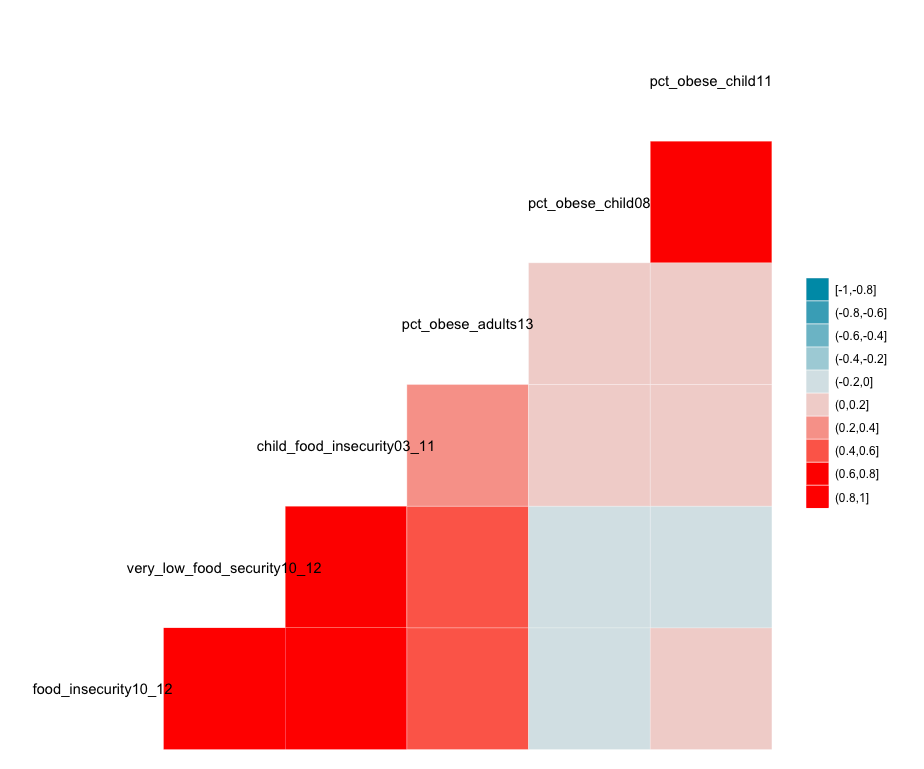

Percentage of obese adults correlate with food insecurity